In [1]:
import json
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Load in the cleaned data
metaPath = 'Data/cleanedMeta.csv'
reviewPath = 'Data/cleanedReviews.csv'

metaDF = pd.read_csv(metaPath, index_col = 0, keep_default_na = False)
reviewDF = pd.read_csv(reviewPath, index_col = 0, keep_default_na = False)

In [3]:
metaDF.head()

,category,description,title,brand,asin
0,"['Professional & Educational Journals', 'Profe...",['REASON is edited for people interested in ec...,,Reason Magazine,B00005N7NQ
1,"['Arts, Music & Photography', 'Music']",['Written by and for musicians. Covers a varie...,,String Letter Publishers,B00005N7OC
2,"['Fashion & Style', 'Women']",['Allure is the beauty expert. Every issue is ...,,Conde Nast Publications,B00005N7OD
3,"['Sports, Recreation & Outdoors', 'Sports & Le...",['FLIGHT JOURNAL includes articles on aviation...,,AirAge Publishing,B00005N7O9
4,"['Professional & Educational Journals', 'Profe...",['RIDER is published for the road and street r...,,EPG Media & Specialty Information,B00005N7O6


In [4]:
metaDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2320 entries, 0 to 3384
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   category     2320 non-null   object
 1   description  2320 non-null   object
 2   title        2320 non-null   object
 3   brand        2320 non-null   object
 4   asin         2320 non-null   object
dtypes: object(5)
memory usage: 108.8+ KB


In [5]:
reviewDF.head()

,overall,reviewerID,asin
0,5.0,AH2IFH762VY5U,B00005N7P0
1,5.0,AOSFI0JEYU4XM,B00005N7P0
2,3.0,A3JPFWKS83R49V,B00005N7OJ
3,5.0,A19FKU6JZQ2ECJ,B00005N7OJ
4,5.0,A25MDGOMZ2GALN,B00005N7P0


In [6]:
reviewDF['overall'] = reviewDF.overall.astype('int')

In [7]:
reviewDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84167 entries, 0 to 89686
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   overall     84167 non-null  int64 
 1   reviewerID  84167 non-null  object
 2   asin        84167 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.6+ MB


## Reviews

## Ratings

### Distribution of overall ratings

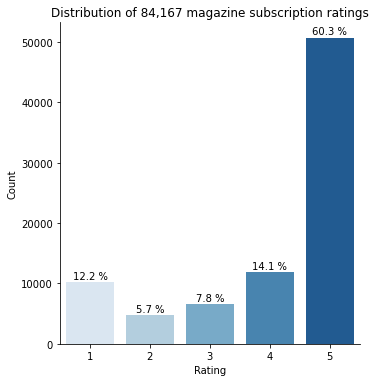

In [8]:
# Rating distribution
ax = sns.catplot(data = reviewDF, x = 'overall', kind = 'count', palette="Blues")
for i, p in enumerate(ax.ax.patches):
    height = p.get_height()
    ax.ax.text(p.get_x()+p.get_width()/2., height + 500, '{:.1f} %'.format((height / len(reviewDF) * 100)),ha="center")
plt.title('Distribution of 84,167 magazine subscription ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

We can see that 60.3% of all ratings in the data are 5s. Very few ratings are 2 and 3.

### Distribution of average rating per reviewer

In [9]:
avg_rating_per_reviewer = reviewDF.groupby('reviewerID').agg({'overall': ['mean', 'count']})
avg_rating_per_reviewer.columns = ['avg_rating', 'num_reviews']
avg_rating_per_reviewer = avg_rating_per_reviewer.reset_index()
avg_rating_per_reviewer.sort_values(['num_reviews', 'avg_rating'])

,reviewerID,avg_rating,num_reviews
8,A095896256EBDK3E42GW,1.000000,1
10,A1000LIQD5GSF0,1.000000,1
14,A1008WMRGO1W67,1.000000,1
19,A100NRVPI4UOH,1.000000,1
30,A101AXJVYM5ZQ2,1.000000,1
...,...,...,...
36494,A30H2335OM7RD6,4.857143,21
30645,A2OTUWUSH49XIN,3.739130,23
44463,A3GA09FYFKL4EY,3.916667,24
57663,AEMZRE6QYVQBS,4.160000,25


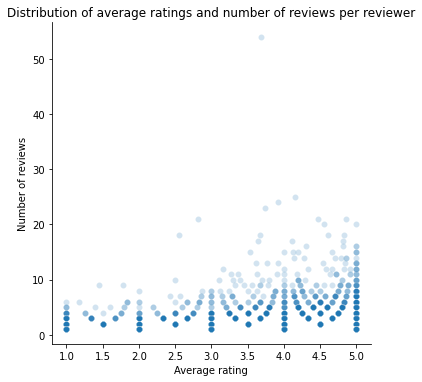

In [10]:
ax = sns.relplot(
    data=avg_rating_per_reviewer, x="avg_rating", y="num_reviews", alpha = .2 ,kind="scatter"
)
plt.xlabel('Average rating')
plt.ylabel('Number of reviews')
plt.title('Distribution of average ratings and number of reviews per reviewer')
plt.show()

In [11]:
avg_rating_per_reviewer.describe()

,avg_rating,num_reviews
count,68482.000000,68482.000000
mean,4.003820,1.229038
std,1.434315,0.823003
min,1.000000,1.000000
25%,3.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,54.000000


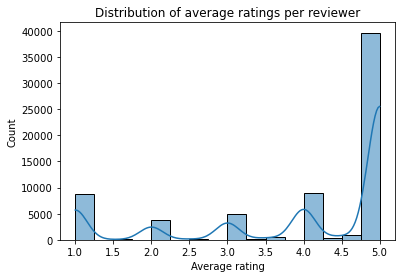

In [12]:
ax = sns.histplot(data=avg_rating_per_reviewer, x="avg_rating", kde = True, binwidth = .25)
plt.title('Distribution of average ratings per reviewer')
plt.xlabel('Average rating')
plt.ylabel('Count')
plt.show()

In [13]:
# Remove reviewers who only reviewed 1 magazine
avg_rating_per_reviewer_filtered = avg_rating_per_reviewer[avg_rating_per_reviewer.num_reviews >= 5][['reviewerID', 'num_reviews', 'avg_rating']].sort_values(['avg_rating', 'num_reviews'], ascending = False)
avg_rating_per_reviewer_filtered


,reviewerID,num_reviews,avg_rating
26717,A2H3JURQZOHVMB,20,5.000000
39079,A35KTWDOK0EXMY,16,5.000000
61714,AMKQP0R290TLS,16,5.000000
28956,A2LI10MAXV0815,15,5.000000
56448,AC98CDA0GZDKJ,15,5.000000
...,...,...,...
34772,A2X06FP2PQ6EK0,6,1.166667
34554,A2WLYUO9WJPWXC,6,1.000000
43440,A3EAMXAJ3DNQVH,5,1.000000
44296,A3FY38E0W6FTO,5,1.000000


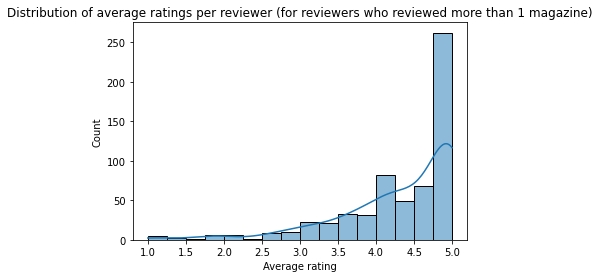

In [14]:
ax = sns.histplot(data=avg_rating_per_reviewer_filtered, x="avg_rating", kde = True, binwidth = .25)
plt.title('Distribution of average ratings per reviewer (for reviewers who reviewed more than 1 magazine)')
plt.xlabel('Average rating')
plt.ylabel('Count')
plt.show()

### Distribution of average rating per magazine¶

In [15]:
# Average rating per magazine
avg_rating_per_mag = reviewDF.groupby('asin').agg({'overall': ['mean', 'count','sum']})
avg_rating_per_mag.columns = ['avg_rating', 'num_reviews', 'total_rating']
avg_rating_per_mag = avg_rating_per_mag.reset_index()
avg_rating_per_mag

,asin,avg_rating,num_reviews,total_rating
0,B00005N7NQ,3.803419,117,445
1,B00005N7O3,3.600000,5,18
2,B00005N7O4,4.333333,6,26
3,B00005N7O6,4.531250,64,290
4,B00005N7O9,4.434783,23,102
...,...,...,...,...
2315,B01HI8V19K,4.000000,1,4
2316,B01HI8V1AE,4.750000,4,19
2317,B01HI8V1C2,4.000000,10,40
2318,B01HI8V1I6,4.500000,24,108


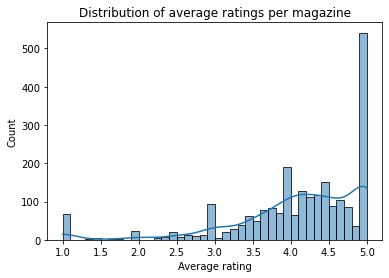

In [16]:
ax = sns.histplot(data=avg_rating_per_mag, x="avg_rating", kde = True, binwidth = .1)
plt.title('Distribution of average ratings per magazine')
plt.xlabel('Average rating')
plt.ylabel('Count')
plt.show()

In [17]:
# Remove magazines who only have 1 review
avg_rating_per_mag_filtered = avg_rating_per_mag[avg_rating_per_mag.num_reviews >= 5][['asin', 'num_reviews', 'avg_rating']].sort_values(['avg_rating', 'num_reviews'], ascending = False)
avg_rating_per_mag_filtered

,asin,num_reviews,avg_rating
472,B00006KOUM,22,5.000000
1387,B001G583TS,18,5.000000
164,B00005Q7E3,16,5.000000
1701,B00IT6YGRU,15,5.000000
370,B00006KBW2,12,5.000000
...,...,...,...
380,B00006KCUI,5,1.800000
1096,B0007INIGI,5,1.800000
701,B00007AWXZ,6,1.666667
1697,B00I34Z1WC,6,1.666667


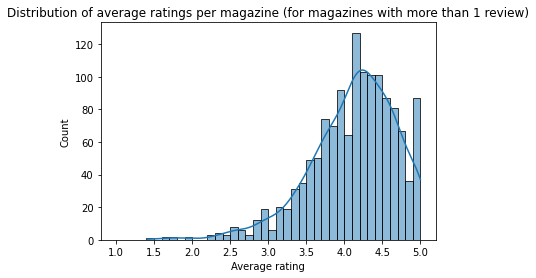

In [18]:
ax = sns.histplot(data=avg_rating_per_mag_filtered, x="avg_rating", kde = True, binwidth = .1, binrange = [1, 5])
plt.title('Distribution of average ratings per magazine (for magazines with more than 1 review)')
plt.xlabel('Average rating')
plt.ylabel('Count')
plt.show()

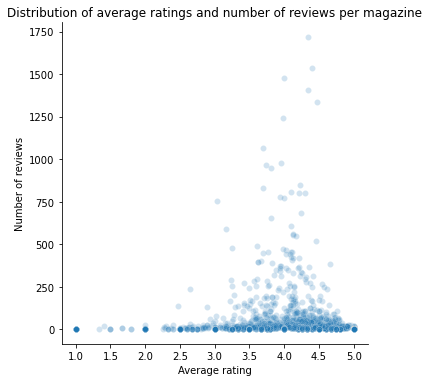

In [19]:
sns.relplot(
    data=avg_rating_per_mag, x="avg_rating", y="num_reviews", alpha = .2, kind="scatter"
)
plt.xlabel('Average rating')
plt.ylabel('Number of reviews')
plt.title('Distribution of average ratings and number of reviews per magazine')
plt.show()

In [20]:
avg_rating_per_mag.describe()

,avg_rating,num_reviews,total_rating
count,2320.000000,2320.000000,2320.000000
mean,4.116696,36.278879,146.787500
std,0.880994,117.263837,478.393244
min,1.000000,1.000000,1.000000
25%,3.750000,2.000000,10.000000
50%,4.266667,6.000000,26.000000
75%,4.800000,20.000000,83.000000
max,5.000000,1718.000000,7467.000000


### Distribution of number of reviews per magazine subscription

In [21]:
avg_rating_per_mag

,asin,avg_rating,num_reviews,total_rating
0,B00005N7NQ,3.803419,117,445
1,B00005N7O3,3.600000,5,18
2,B00005N7O4,4.333333,6,26
3,B00005N7O6,4.531250,64,290
4,B00005N7O9,4.434783,23,102
...,...,...,...,...
2315,B01HI8V19K,4.000000,1,4
2316,B01HI8V1AE,4.750000,4,19
2317,B01HI8V1C2,4.000000,10,40
2318,B01HI8V1I6,4.500000,24,108


In [22]:
avg_rating_per_mag.value_counts('num_reviews')

num_reviews
1       406
2       237
3       169
4       143
5       124
       ... 
167       1
162       1
161       1
158       1
1718      1
Length: 233, dtype: int64

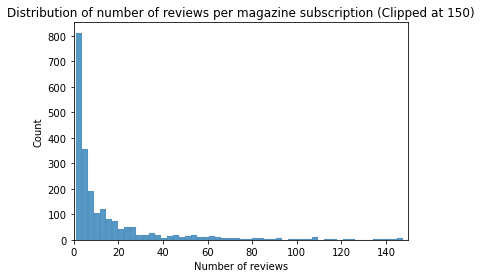

In [23]:
#Ratings by magazine
ax = sns.histplot(data = avg_rating_per_mag, x = 'num_reviews')
plt.title('Distribution of number of reviews per magazine subscription (Clipped at 150)')
plt.xlabel('Number of reviews')
plt.xlim([0,150])
plt.show()

Most magazine subscriptions received only 1 review. Very few magazine subscriptions have many ratings, although the most rated magazine subscription received 1718 reviews.

In [24]:
avg_rating_per_mag.describe()

,avg_rating,num_reviews,total_rating
count,2320.000000,2320.000000,2320.000000
mean,4.116696,36.278879,146.787500
std,0.880994,117.263837,478.393244
min,1.000000,1.000000,1.000000
25%,3.750000,2.000000,10.000000
50%,4.266667,6.000000,26.000000
75%,4.800000,20.000000,83.000000
max,5.000000,1718.000000,7467.000000


### Distribution of number of reviews per reviewer

In [25]:
avg_rating_per_reviewer

,reviewerID,avg_rating,num_reviews
0,A0068533X8Y5TYUJWWIC,5.0,1
1,A02292976AOUT3I4ZLFA,5.0,1
2,A0333047WGK24IZKLDP2,4.0,1
3,A0479411TZTHITJ9TFB8,5.0,1
4,A0534350D18UHJKPKZ1W,5.0,1
...,...,...,...
68477,AZZS7W015QH2L,5.0,1
68478,AZZVFTH1QONVD,5.0,1
68479,AZZXJAE2DILET,3.0,1
68480,AZZXKCCW8GG21,5.0,1


In [26]:
avg_rating_per_reviewer.value_counts('num_reviews')

num_reviews
1     58606
2      7174
3      1554
4       540
5       234
6       126
7        78
8        48
9        33
10       19
11       15
12       11
13        9
15        8
14        7
16        4
18        4
17        3
21        3
20        2
23        1
24        1
25        1
54        1
dtype: int64

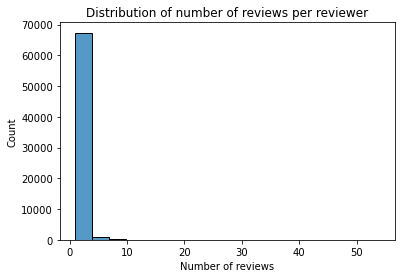

In [28]:
ax = sns.histplot(data = avg_rating_per_reviewer, x = 'num_reviews')
plt.title('Distribution of number of reviews per reviewer')
plt.xlabel('Number of reviews')
plt.show()

Most reviewers only gave 1 review and not many reviewers gave many reviews. The most productive reviewer gave 54 reviews.

In [29]:
avg_rating_per_reviewer.describe()

,avg_rating,num_reviews
count,68482.000000,68482.000000
mean,4.003820,1.229038
std,1.434315,0.823003
min,1.000000,1.000000
25%,3.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,54.000000


### Most popular magazine subscriptions

#### Top 5 most reviewed magazine subscriptions

In [30]:
top_5_most_reviewed = avg_rating_per_mag.sort_values('num_reviews', ascending = False)[:5]
top_5_most_reviewed

,asin,avg_rating,num_reviews,total_rating
129,B00005NIOH,4.346333,1718,7467
24,B00005N7Q1,4.406636,1537,6773
62,B00005N7SC,3.993919,1480,5911
769,B00007B10Y,4.335699,1409,6109
1397,B001LF4EVO,4.466766,1339,5981


In [31]:
pd.set_option('display.max_colwidth', None)
metaDF[metaDF.asin.isin(top_5_most_reviewed.asin.to_list())]

,category,description,title,brand,asin
35,"['Home & Garden', 'How-to & Home Improvements']","['Tackle any home improvement project or repair with help from The Family Handyman. Guarantee success with step-by-step instructions and how-to photos, plus save time and money with handy hints, workshop tips and new product reviews. No matter how little experience you have, The Family Handyman makes it easy! Family Handyman publishes 11 issues per year which includes a special issue that counts as 2 issues in your subscription.']",,"Trusted Media Brands, Inc",B00005N7Q1
46,"['Science, History & Nature', 'Essays & Commentary']","['The \'What\'s New\'"" magazine of science and technology. Covering the latest developments in cars, electronics, communications, tools, energy, aviation, science, space exploration and much more.']",,Bonnier Corporation,B00005N7SC
117,"['Professional & Educational Journals', 'Professional & Trade', 'Humanities & Social Sciences', 'History']","['NATIONAL GEOGRAPHIC, the flagship magazine of the National Geographic Society, chronicles exploration and adventure, as well as changes that impact life on Earth. Editorial coverage encompasses people and places of the world, with an emphasis on human involvement in a changing universe. Major topics include culture, nature, geography, ecology, science and technology.', ""National Geographic magazine has maintained its status as one of the most-read publications for over one hundred years because of its quality educational content, riveting emotional stories, and vivid photographic essays. Its in-depth analysis of breaking news and detailed coverage of trending topics delves deep into the topics of geography, popular science, history, culture, and current events. It also includes informative articles on the environment, stunning images of Mother Nature at her best, and exhilarating tales of wild adventures. <br /><br /> National Geographic magazine offers you an inside look at the most interesting people and places from all over the world. Many stories contain detailed maps and images that take you along for the incredible journey. National Geographic magazine is designed to inspire, inform, and entertain a vast audience through compelling editorials and breathtaking photography. It also hosts a variety of written composition, artistic, and photography contests for potential future contributors. <br /><br /> National Geographic magazine's content is thoroughly researched to provide you with credible information that you know you can trust. It relies on its exceptionally high standards and experienced journalists to uphold its timeless tradition of high-quality original content. The iconic magazine focuses on anything and everything that makes this world exciting, so you will have a hard time putting it down once you start reading. <br /><br /> A subscription to National Geographic magazine will give you the ability to travel the world we live in from the comfort of your own home and possibly inspire you to visit new and adventurous places in real life.""]",,National Geographic Partners LLC,B00005NIOH
731,"['Literary, Sci-Fi & Mystery', 'Literary Magazines & Journals']","['Discover thousands of tips in health, family, home, money and more for living a richer, more satisfying life. Its everything you need, in one easy read!']",,"Trusted Media Brands, Inc",B00007B10Y
2462,"['Cooking, Food & Wine', 'Recipes & Techniques']","['Food Network Magazine is HERE. Each issue is packed with inside scoops & tips from everyones favorite TV stars. Plus hundreds of recipes!', '<hr class=""bucketDivider"" size=""1"" /> <div class=""bucket"" id=""productDescription""> <div class=""content"">', '<strong><span style=""font-family: Verdana,Arial,Helvetica,sans-serif; color: #cc6600;"">Who Reads <em>Food Network Magazine</em>?</span></strong> <br /> The <em>Food Network Magazine</em> reader is a total food enthusiast--passionate, imaginative, and sees cooking as an expression of their creativ

#### Top 5 magazine subscriptions (based on average rating)

In [32]:
# set a threshold that only includes magazines with 5 or more reviews
top_5_rating = avg_rating_per_mag[avg_rating_per_mag.num_reviews >= 5].sort_values(['avg_rating', 'num_reviews'], ascending = False)[:5]
top_5_rating

,asin,avg_rating,num_reviews,total_rating
472,B00006KOUM,5.0,22,110
1387,B001G583TS,5.0,18,90
164,B00005Q7E3,5.0,16,80
1701,B00IT6YGRU,5.0,15,75
370,B00006KBW2,5.0,12,60


In [34]:
pd.set_option('display.max_colwidth', 100)
metaDF[metaDF.asin.isin(top_5_rating.asin.to_list())]

,category,description,title,brand,asin
164,"['Sports, Recreation & Outdoors', 'Sports & Leisure', 'Hunting & Firearms']","[""Gray's Sporting Journal more than just a publication. It's an experience. Gray's has a reputat...",,Morris Communications Corp.,B00005Q7E3
429,"['Sports, Recreation & Outdoors', 'Sports & Leisure', 'Cycling']","['Directed to off-road motorcyclists of all ages, with equal emphasis on recreational and compet...",,Hi-Torque Publications,B00006KBW2
477,"['Literary, Sci-Fi & Mystery', 'Literary Magazines & Journals']","[""Mystery Scene offers lively, expert coverage of the entire mystery world, with emphasis on the...",,Kbs Communications,B00006KOUM
2452,['Home & Garden'],"['House & Home is a premiere design, decorating and lifestyle magazine that takes you inside the...",,Canadian Home Publishers,B001G583TS
2767,,"[""Do you want to 'Be your Own Success Story'? Subscribe to B.O.S.S. eMagazine, the premier educa...",,Clay & Clay Llc,B00IT6YGRU


### Least popular magazine subscriptions


#### Bottom 5 magazines (based on average rating)

In [35]:
# set a threshold that only includes magazines with 5 or more reviews
bottom_5_rating = avg_rating_per_mag[avg_rating_per_mag.num_reviews >= 5].sort_values(['avg_rating', 'num_reviews'], ascending = [True, False])[:5]
bottom_5_rating

,asin,avg_rating,num_reviews,total_rating
1238,B000HWY0HA,1.411765,17,24
701,B00007AWXZ,1.666667,6,10
1697,B00I34Z1WC,1.666667,6,10
380,B00006KCUI,1.800000,5,9
1096,B0007INIGI,1.800000,5,9


In [37]:
pd.set_option('display.max_colwidth', None)


metaDF[metaDF.asin.isin(bottom_5_rating.asin.to_list())]

,category,description,title,brand,asin
377,"['Fashion & Style', 'Women']","['As with its English counterpart, the French edition of Elle magazine focuses on the world of fashion, beauty, and style. Each glamorous, glossy issue highlights the latest trends around the world and offers self-help articles, celebrity profiles and interviews, and practical how-to information.']",,Hachette Filipacchi,B00006KCUI
682,"['Professional & Educational Journals', 'Professional & Trade', 'Arts', 'Decorative Arts']","['A magazine of furnishings and interior design addressed mainly to women readers in the medium to high cultural segment. The furnishing and design features are extremely refined, including a lively interest in the international scene and latest trends.']",,Hearst Magazines Italia Spa,B00007AWXZ
2161,['Professional & Educational Journals'],"['<I>V Magazine</I> was launched in September 1999 as the younger sibling publication to the limited-edition quarterly <I>Visionaire</I> <I>V</I> is large format and visually driven, international in scope and collaborative in spirit—a place where ""high art converses with underground culture."" It is about fashion and all the things that go with it, such as art, music, film, and architecture.']",,Visionaire Publishing,B0007INIGI
2303,,['A complete reference for expectant and new parents. It addresses the health and medical issues of pregnancy as well as infant and childcare.'],,Meredith,B000HWY0HA
2762,"['Professional & Educational Journals', 'Professional & Trade', 'Entertainment & Media']","['Variety has always been the premier source of entertainment industry information. And now the redesigned Variety provides more news, more features and a deeper analysis of the most important trends in entertainment. Count on Variety for complete, credible coverage of film, tv, and digital.']",,"Penske Business Media, LLC",B00I34Z1WC


### Categories

#### Number of magazines per category

In [38]:
import ast
metaDF.category = metaDF.category.apply(lambda x : ast.literal_eval(x) if x != '' else x)

In [39]:
cat_counts = pd.DataFrame(metaDF.category.explode().value_counts().reset_index())
cat_counts.columns = ['category', 'count']
cat_counts

,category,count
0,Professional & Educational Journals,497
1,Professional & Trade,491
2,,442
3,"Sports, Recreation & Outdoors",232
4,Sports & Leisure,222
...,...,...
173,Physics,1
174,Careers,1
175,Nursing,1
176,Soccer,1


In [40]:
# Remove '' category
cat_counts = cat_counts[~(cat_counts.category == '')]

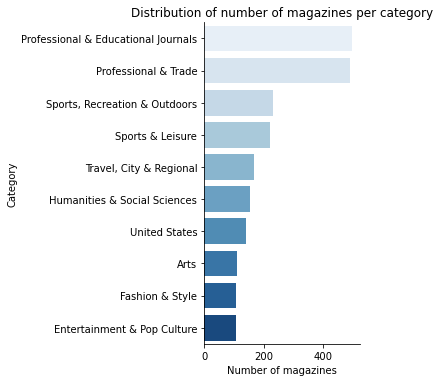

In [79]:
# Number of magazines per category
ax = sns.catplot(data = cat_counts[:10], y = 'category', x = 'count', kind = 'bar', orient= 'h', palette="Blues")
plt.title('Distribution of number of magazines per category')
plt.xlabel('Number of magazines')
plt.ylabel('Category')
plt.show()

#### Most reviewed magazine categories

In [44]:
joined = metaDF.join(avg_rating_per_mag[['asin', 'num_reviews', 'total_rating']].set_index('asin'), on = 'asin')
split_cat_reviews = joined.drop(columns = 'category').join(joined.category.explode())
groupped_split_cat = split_cat_reviews.groupby('category').sum().sort_values('num_reviews', ascending = False).reset_index()
groupped_split_cat['avg_rating'] = groupped_split_cat['total_rating']/groupped_split_cat['num_reviews']
groupped_split_cat

,category,num_reviews,total_rating,avg_rating
0,Professional & Educational Journals,11260,47294,4.200178
1,Professional & Trade,11049,46353,4.195221
2,Home & Garden,8941,37619,4.207471
3,"Cooking, Food & Wine",8085,33683,4.166110
4,"Sports, Recreation & Outdoors",7403,29775,4.022018
...,...,...,...,...
173,Careers,2,10,5.000000
174,Mathematics,2,7,3.500000
175,Soccer,1,5,5.000000
176,Self-Improvement,1,1,1.000000


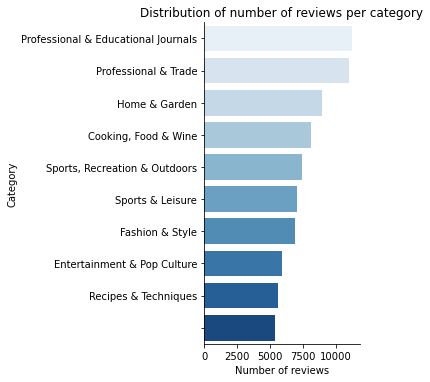

In [80]:
#Number of reviews per category
ax = sns.catplot(data = groupped_split_cat[:10], y = 'category', x = 'num_reviews', kind = 'bar', orient = 'h', palette="Blues")
plt.title('Distribution of number of reviews per category')
plt.xlabel('Number of reviews')
plt.ylabel('Category')
plt.show()

#### Top magazine categories (based on average rating)

In [95]:
top_cat = groupped_split_cat[groupped_split_cat.num_reviews >= 5].sort_values(['avg_rating', 'num_reviews'], ascending = False)
top_cat[:10]

,category,num_reviews,total_rating,avg_rating
145,Advertising,18,90,5.000000
158,Geography,11,55,5.000000
162,Occult,9,44,4.888889
120,History of Education,72,345,4.791667
163,Agricultural Sciences,8,38,4.750000
131,Performing Arts,48,226,4.708333
139,Outdoors & Nature,25,117,4.680000
152,Theory & Practice,15,70,4.666667
157,Alternative & Holistic,12,56,4.666667
95,Education,180,838,4.655556


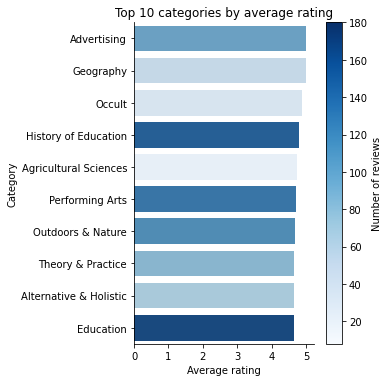

In [94]:
# Top magazine categories
norm = plt.Normalize(top_cat['num_reviews'][:10].min(), top_cat['num_reviews'][:10].max())
sm = plt.cm.ScalarMappable(cmap="Blues", norm=norm)
sm.set_array([])

ax = sns.catplot(data = top_cat[:10], y = 'category', x = 'avg_rating', hue = 'num_reviews', kind = 'bar', orient = 'h', palette="Blues", dodge = False, legend = False)
plt.title('Top 10 categories by average rating')
plt.xlabel('Average rating')
plt.ylabel('Category')

cbar = ax.fig.colorbar(sm)
cbar.set_label('Number of reviews')

plt.show()

#### Bottom magazine categories (based on average rating)

In [51]:
bottom_cat = groupped_split_cat[groupped_split_cat.num_reviews >= 5].sort_values(['avg_rating', 'num_reviews'], ascending = [False, True])
bottom_cat

,category,num_reviews,total_rating,avg_rating
158,Geography,11,55,5.000000
145,Advertising,18,90,5.000000
162,Occult,9,44,4.888889
120,History of Education,72,345,4.791667
163,Agricultural Sciences,8,38,4.750000
...,...,...,...,...
140,Graphic Design,24,79,3.291667
156,Hockey,13,42,3.230769
159,12 & Up,10,32,3.200000
122,Investing,63,197,3.126984


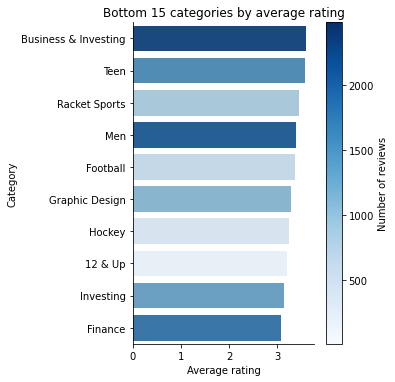

In [116]:
# Bottom magazine categories
norm = plt.Normalize(bottom_cat['num_reviews'][-10:].min(), bottom_cat['num_reviews'][-10:].max())
sm = plt.cm.ScalarMappable(cmap="Blues", norm=norm)
sm.set_array([])

ax = sns.catplot(data = bottom_cat[-10:], y = 'category', x = 'avg_rating', kind = 'bar', orient = 'h', hue = 'num_reviews', palette="Blues", dodge = False, legend = False)
plt.title('Bottom 15 categories by average rating')
plt.xlabel('Average rating')
plt.ylabel('Category')

cbar = ax.fig.colorbar(sm)
cbar.set_label('Number of reviews')

plt.show()

In [53]:
bottom_cat[-10:]

,category,num_reviews,total_rating,avg_rating
24,Business & Investing,2483,8900,3.584374
94,Teen,183,655,3.579235
147,Racket Sports,18,62,3.444444
36,Men,1561,5270,3.376041
154,Football,14,47,3.357143
140,Graphic Design,24,79,3.291667
156,Hockey,13,42,3.230769
159,12 & Up,10,32,3.200000
122,Investing,63,197,3.126984
53,Finance,854,2625,3.073770


### Brands

#### Number of magazines per brand

In [100]:
brand_count = metaDF.brand.value_counts().to_frame().reset_index()
brand_count.columns = ['brand', 'count']
brand_count

,brand,count
0,Hearst Magazines,255
1,Conde Nast,184
2,,147
3,Meredith,48
4,Bonnier Corporation,43
...,...,...
938,Outback Publishing,1
939,Good Old Boat Inc,1
940,Open Matrix Group,1
941,Chipotle Publishing Llc,1


In [101]:
# Remove '' brand
brand_count = brand_count[~(brand_count.brand == '')]

In [112]:
brand_count[:10]

,brand,count
0,Hearst Magazines,255
1,Conde Nast,184
3,Meredith,48
4,Bonnier Corporation,43
5,Outdoor Sportsman Group - Integrated Media,37
6,The Enthusiast Network,32
7,Rodale Inc.,27
8,Active Interest Media,24
9,F&W Publications,23
10,Meredith Corporation,22


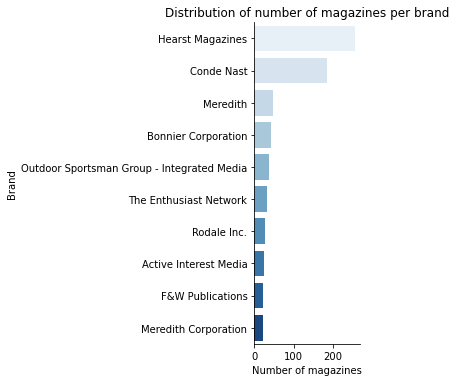

In [103]:
#Number of magazines per brand
ax = sns.catplot(data = brand_count[:10], y = 'brand', x = 'count', kind = 'bar', orient = 'h', palette="Blues")
plt.title('Distribution of number of magazines per brand')
plt.xlabel('Number of magazines')
plt.ylabel('Brand')
plt.show()

#### Most reviewed magazine brand

In [105]:
brand_reviews = joined.drop(columns = ['category', 'description', 'title'])
brand_reviews_groupped = brand_reviews.groupby('brand').sum().sort_values('num_reviews', ascending = False).reset_index()
brand_reviews_groupped['avg_rating'] = brand_reviews_groupped['total_rating']/brand_reviews_groupped['num_reviews']

brand_reviews_groupped

,brand,num_reviews,total_rating,avg_rating
0,Hearst Magazines,13788,55007,3.989484
1,Meredith Corporation,6941,28139,4.054027
2,Meredith,4746,19184,4.042141
3,Conde Nast Publications,3636,13930,3.831133
4,National Geographic Partners LLC,3163,13414,4.240911
...,...,...,...,...
938,Skitrax Magazine,1,5,5.000000
939,Editions Nuit Et Jour,1,4,4.000000
940,Mediacorp Pte Ltd,1,3,3.000000
941,Better Beagling,1,5,5.000000


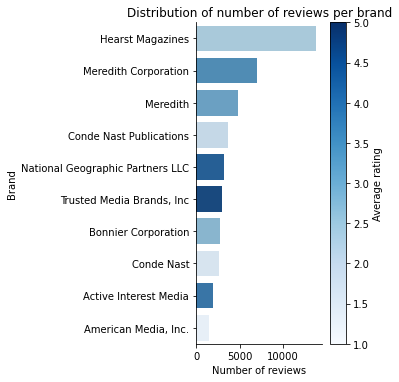

In [120]:
#Number of reviews per brand
norm = plt.Normalize(1, 5)
sm = plt.cm.ScalarMappable(cmap="Blues", norm=norm)
sm.set_array([])

ax = sns.catplot(data = brand_reviews_groupped[:10], y = 'brand', x = 'num_reviews', hue = 'avg_rating', kind = 'bar', orient = 'h', palette="Blues", legend = False, dodge = False)
plt.title('Distribution of number of reviews and average rating per brand')
plt.xlabel('Number of reviews')
plt.ylabel('Brand')


cbar = ax.fig.colorbar(sm)
cbar.set_label('Average rating')

plt.show()

#### Top magazine brands (based on average rating)

In [121]:
top_brands = brand_reviews_groupped[brand_reviews_groupped.num_reviews >= 5].sort_values(['avg_rating', 'num_reviews'], ascending = False)
top_brands[:10]

,brand,num_reviews,total_rating,avg_rating
243,Kbs Communications,22,110,5.0
291,Canadian Home Publishers,18,90,5.0
320,Clay & Clay Llc,15,75,5.0
358,Historical Enterprises Llc,12,60,5.0
361,Kmt Communications,12,60,5.0
394,Psychotherapy Networker,10,50,5.0
395,Montana Outdoors,10,50,5.0
397,Our Sunday Visitor Inc,10,50,5.0
398,Wild Fibers,10,50,5.0
417,Louisiana Publications Inc.,9,45,5.0


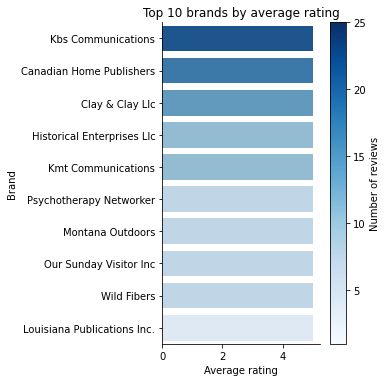

In [126]:
# Top magazine brands
norm = plt.Normalize(1, 25)
sm = plt.cm.ScalarMappable(cmap="Blues", norm=norm)
sm.set_array([])

ax = sns.catplot(data = top_brands[:10], y = 'brand', x = 'avg_rating', kind = 'bar', hue = 'num_reviews', orient = 'h', palette = 'Blues', dodge = False, legend = False)
plt.title('Top 10 brands by average rating')
plt.xlabel('Average rating')
plt.ylabel('Brand')

cbar = ax.fig.colorbar(sm)
cbar.set_label('Number of reviews')

plt.show()

#### Bottom magazine brands (based on average rating)

In [127]:
bottom_brands = brand_reviews_groupped[brand_reviews_groupped.num_reviews >= 5].sort_values(['avg_rating', 'num_reviews'], ascending = [False, True])
bottom_brands[-10:]

,brand,num_reviews,total_rating,avg_rating
379,MusicMaker Magazine,11,29,2.636364
526,Bloomberg Financial Markets,5,13,2.600000
382,"American Angler Publications, Inc.",11,28,2.545455
447,Tathaastu,8,20,2.500000
538,Porthole Magazine,5,12,2.400000
470,Et Publishing Intl Llc,7,16,2.285714
209,Home Business Magazine,27,54,2.000000
581,Visionaire Publishing,5,9,1.800000
493,Hearst Magazines Italia Spa,6,10,1.666667
502,"Penske Business Media, LLC",6,10,1.666667


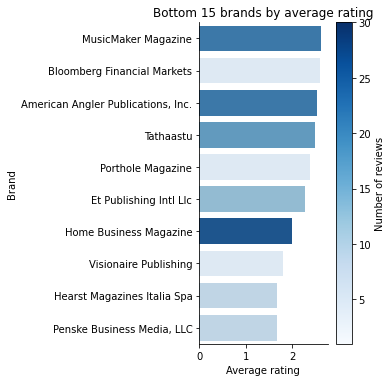

In [131]:
# Bottom magazine brands

norm = plt.Normalize(1, 30)
sm = plt.cm.ScalarMappable(cmap="Blues", norm=norm)
sm.set_array([])


ax = sns.catplot(data = top_brands[-10:], y = 'brand', x = 'avg_rating', hue = 'num_reviews', kind = 'bar', orient = 'h', palette="Blues", dodge = False, legend = False)
plt.title('Bottom 10 brands by average rating')
plt.xlabel('Average rating')
plt.ylabel('Brand')

cbar = ax.fig.colorbar(sm)
cbar.set_label('Number of reviews')

plt.show()

## Reviewer 'A5RHZE7B8SV5Q'

Let's look closely at a single Amazon customer. 

In [137]:
reviewer = reviewDF[reviewDF.reviewerID == 'A5RHZE7B8SV5Q'].sort_values('overall')
reviewer

,overall,reviewerID,asin
426,1,A5RHZE7B8SV5Q,B00005N7P0
23329,2,A5RHZE7B8SV5Q,B00005NIPX
3752,4,A5RHZE7B8SV5Q,B00005N7S5
70,5,A5RHZE7B8SV5Q,B00005N7PS
9239,5,A5RHZE7B8SV5Q,B00005N7TL
11880,5,A5RHZE7B8SV5Q,B00005N7QI
21963,5,A5RHZE7B8SV5Q,B00005NIND
24778,5,A5RHZE7B8SV5Q,B00005QDWQ


In [139]:
print("Reviewer 'A5RHZE7B8SV5Q' reviewed {} magazines in total, gave {} 5-stars, {} 4-stars, {} 3-stars, {} 2-stars and {} 1-star.".format(
    len(reviewer), len(reviewer[reviewer.overall == 5]), len(reviewer[reviewer.overall == 4]), len(reviewer[reviewer.overall == 3]), len(reviewer[reviewer.overall == 2]), len(reviewer[reviewer.overall == 1]))
)

Reviewer 'A5RHZE7B8SV5Q' reviewed 8 magazines in total, gave 5 5-stars, 1 4-stars, 0 3-stars, 1 2-stars and 1 1-star.


In [140]:
pd.set_option('display.max_colwidth', None)
metaDF.join(reviewer.set_index('asin'), on = 'asin', how = 'right').reset_index()

index  \
0      5   
1    126   
2     33   
3     65   
4     79   
5     29   
6    144   
7    169   

                                                                             category  \
0                                                  [Technology, Computers & Internet]   
1  [Professional & Educational Journals, Professional & Trade, Entertainment & Media]   
2                                                  [Technology, Computers & Internet]   
3                                                              [Fashion & Style, Men]   
4                                             [Science, History & Nature, Technology]   
5                                                              [Fashion & Style, Men]   
6                                        [Cooking, Food & Wine, Recipes & Techniques]   
7                    [Literary, Sci-Fi & Mystery, Science Fiction & Fantasy, Fantasy]   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    